<a href="https://colab.research.google.com/github/pavanraja753/PyTorch_Learning/blob/main/datasets%20and%20dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and Saving a files

In [11]:
import numpy as np
import torch
tmp_array = np.ones((3,3))
tmp_array_pkl = np.array([[0,1],[2,3,4],[5,6,7,8]],dtype=object)

In [12]:
# npy format
np.save("tmp_array.npy", tmp_array)
np.save("tmp_array_pkl.npy", tmp_array_pkl,allow_pickle=True)

read_array = np.load('tmp_array.npy')
read_array_pkl = np.load('tmp_array_pkl.npy',allow_pickle=True)

# Dataset

In [13]:
from torch.utils import data
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        # Use __init__ to load the data to the class (or preprocess) so it can be access later
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.Y)

        # PyTorch use len method to find how many datapoints are in your dataset

    def __getitem__(self, index):

        # getitem is called multiple times, so do less processing here and do most of it in the __init__ method

        X = self.X[index].float().reshape(-1)
        Y = self.Y[index].long()

        return X, Y
    

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_workers = 8 if device == 'cuda' else 0
print(num_workers)

0


# Training

In [ ]:
train_dataset = MyDataset(train.train_data, train.lebel_data)
train_loader_args = dict(shuffle=True, batch_sze=256, num_workers = num_workers, pin_memory=True) if cuda else dict(shuffle=True, batch_sze=256)
train_loader = DataLoader(train_data, **train_loader_args)

# Reading and Loading Numpy arrays

In [17]:
# npy

tmp_array = np.ones((3,3))
np.save("tmp_array.npy",tmp_array)
read_array = np.load('tmp_array.npy')

# Custom Dataset and DataLoader

In [19]:
xs = list(range(10))
ys = list(range(10,20))
print('xs values',xs)
print('ys values',ys)

xs values [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ys values [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [20]:
data = list(zip(xs,ys))

In [21]:
data[0]

(0, 10)

In [23]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys

    def __len__(self):
        return len(self.xs)

    def __getitem__(self, index):
        return self.xs[index], self.ys[index]


In [24]:
dataset = MyDataset(xs, ys)

In [26]:
for x,y in DataLoader(dataset):
    print(x,y)

tensor([0]) tensor([10])
tensor([1]) tensor([11])
tensor([2]) tensor([12])
tensor([3]) tensor([13])
tensor([4]) tensor([14])
tensor([5]) tensor([15])
tensor([6]) tensor([16])
tensor([7]) tensor([17])
tensor([8]) tensor([18])
tensor([9]) tensor([19])


In [27]:
for x,y in DataLoader(dataset,batch_size=2):
    print(x,y)

tensor([0, 1]) tensor([10, 11])
tensor([2, 3]) tensor([12, 13])
tensor([4, 5]) tensor([14, 15])
tensor([6, 7]) tensor([16, 17])
tensor([8, 9]) tensor([18, 19])


In [28]:
for index, (x,y) in enumerate(DataLoader(dataset, batch_size=2, shuffle=True)):
    print('index: ',index, "x,y",x,y)

index:  0 x,y tensor([1, 9]) tensor([11, 19])
index:  1 x,y tensor([7, 5]) tensor([17, 15])
index:  2 x,y tensor([6, 4]) tensor([16, 14])
index:  3 x,y tensor([2, 3]) tensor([12, 13])
index:  4 x,y tensor([8, 0]) tensor([18, 10])


In [29]:
# Training
train_loader_args = dict(shuffle=True, batch_size=2, num_workers=2, pin_memory = True)
train_loader = DataLoader(dataset, **train_loader_args)

# Torch Dataset and DataLoaders

In [30]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from torchvision import datasets
import matplotlib.pyplot as plt

# Fashion MNIST dataset from TorchVision

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform= ToTensor()
)


test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



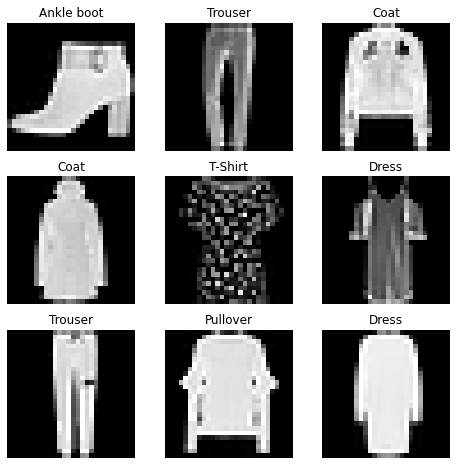

In [33]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sniker",
    8: "Bag",
    9: "Ankle boot"
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")

plt.show()

In [36]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle = False)

Features batch size: torch.Size([64, 1, 28, 28])
Labels batch size: torch.Size([64])


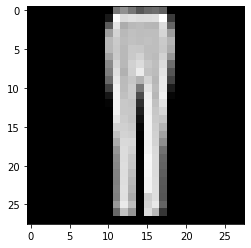

Label: 1


In [42]:
# Display image and label
train_featues, train_labels = next(iter(train_dataloader))
print(f"Features batch size: {train_featues.size()}")
print(f"Labels batch size: {train_labels.size()}")

img = train_featues[0].squeeze(0)
label = train_labels[0]

plt.imshow(img, cmap = "gray")
plt.show()
print(f"Label: {label}")

# Custom ImageDataset

In [46]:
# Save MNIST images in zip and labels in annotations file

train_images_custom = []
train_labels_custom = []
for i in range(10):
    train_images_custom.append(training_data[i][0].numpy())
    train_labels_custom.append(training_data[i][1])

images_npy = np.array(train_images_custom)
np.save("images_npy.npy",images_npy)

labels_npy = np.array(train_labels_custom)
np.save("labels_npy.npy", labels_npy)


In [48]:
class CustomDataset(Dataset):
    def __init__(self, images_npy, labels_npy):
        self.imgs = np.load(images_npy)
        self.img_labels = np.load(labels_npy)

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, index):
        return self.imgs[index], self.img_labels[index]

    def collate_fn(self, batch):

        xs, ys = zip(*batch)

        # For demo - padding

        return xs, ys

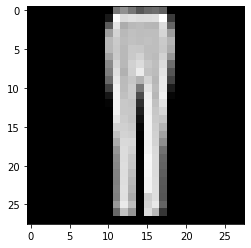

Label: (5, 0)


In [52]:
train_data_custom = CustomDataset("images_npy.npy", "labels_npy.npy")
train_args = dict(batch_size=2, shuffle = True, collate_fn = train_data_custom.collate_fn)
train_dataloader_custom = DataLoader(train_data_custom, **train_args)

# Display label and image
train_features, train_labels = next(iter(train_dataloader_custom))
img = train_featues[0].squeeze()
label = train_labels
plt.imshow(img, cmap = "gray")
plt.show()
print(f"Label: {label}")